In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
##### set plot params ######
SMALL_SIZE = 8
BIGGER_SIZE = 12
BIGGEST_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

colors = ['C0','C1','C2','C3','C4']

In [3]:
from cosmo import Cosmology
cosmo = Cosmology()

In [4]:
import sys
sys.path.append("../velocity_moments")

from cleft_fftw import CLEFT

In [808]:
k, p = np.loadtxt('./pk_Planck2018BAO_matterpower_z000.dat').T

In [6]:
zs = [0,1]
spectra_files  = ['./LBEmulator/data/pc_z000_R0.txt','./LBEmulator/data/pc_z100_R0.txt']
zeldas = []
for ii, z in enumerate(zs):
    zeldas += [CLEFT(k,p*cosmo.iDz(z)**2,shear=True,one_loop=True)]; zeldas[ii].make_ptable()

In [7]:
#zelda = CLEFT(k,p); zelda.make_ptable()

In [8]:
# Load Spectra

In [9]:
a = 0.5
z = 1./a - 1
spectra = np.loadtxt('./LBEmulator/code/output/cm_lowres-20stepB1/spectra-5000-1024-0512-R0.txt')

In [10]:
# presumably these are: k, 1, b1, b2, bs, bk, b1^2, b1 b2, b1 bs, b1 bk, b2^2, b2 bs, b2 bk, bs^2, bs bk, bk^2

In [11]:
# We'll use the indices 0, 1, 2, 3, 4 for 1, b1, b2, bs, bk
# such that P_{ij} has indices 1 + i * (11-i)/2 + (j-i) = 
# e.g. bs bk is (3,4) and is thus in place 1 + 3 * (11-3)/2 + (4-3) = 14

# Note that we always want i <= j in this formula
comp_strs = [r'$1$', r'$b_1$',r'$b_2$',r'$b_s$',r'$b_\nabla$']
comp_strs = [r'$1$', r'$\delta$',r'$\delta^2$',r'$s^2$',r'$\nabla^2\delta$']

def spec_index(inds):
    iord, jord = np.sort(inds)
    return iord, jord, int(1 + iord * (11-iord)/2 + (jord-iord))



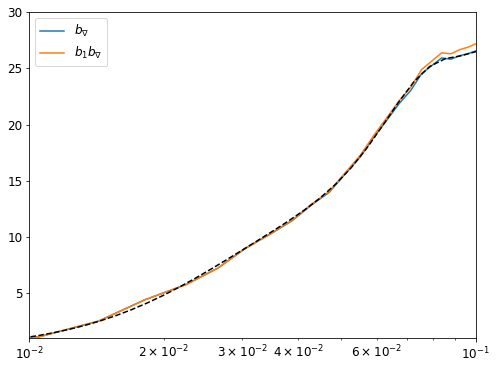

In [400]:
plt.figure(figsize=(8,6))

#zelda = CLEFT(k,p*cosmo.iDz(z)**2,shear=True,one_loop=True); zelda.make_ptable()

zelda = zeldas[1]

cleft_dict = {(0,0):zelda.pktable[:,1]+zelda.pktable[:,2]+zelda.pktable[:,3],\
              (0,1):zelda.pktable[:,4]/2, (1,1):zelda.pktable[:,5],\
              (0,2):zelda.pktable[:,6], (1,2):zelda.pktable[:,7], (2,2):zelda.pktable[:,8]*4,\
              (0,3):zelda.pktable[:,9]/2, (1,3):zelda.pktable[:,10]/2, (2,3):zelda.pktable[:,11], (3,3):zelda.pktable[:,12],\
              (0,4):zelda.pktable[:,0]**2*zelda.pktable[:,1], (1,4):zelda.pktable[:,0]**2*zelda.pktable[:,5]}

#plt.loglog(spectra[:,0], spectra[:,1])
#plt.loglog(spectra[:,0], spectra[:,2])

#plt.loglog(spectra[:,0], np.abs(spectra[:,3]) )
#plt.loglog(spectra[:,0], np.abs(spectra[:,7]) )
#plt.loglog(spectra[:,0], np.abs(spectra[:,10]) )

#plt.loglog(spectra[:,0], np.abs(spectra[:,4]) )
#plt.loglog(spectra[:,0], np.abs(spectra[:,8]) )
#plt.loglog(spectra[:,0], np.abs(spectra[:,11]) )
#plt.loglog(spectra[:,0], np.abs(spectra[:,13]) )


plt.loglog(spectra[:,0], -spectra[:,5],label=r'$b_\nabla$')
plt.loglog(spectra[:,0], -spectra[:,9],label=r'$b_1 b_\nabla$')
#plt.loglog(spectra[:,0], np.abs(spectra[:,6]) )

#plt.loglog(zelda.pktable[:,0], cleft_dict[(0,0)], 'k--')
#plt.loglog(zelda.pktable[:,0], cleft_dict[(0,1)], 'k--')
#plt.loglog(zelda.pktable[:,0], cleft_dict[(1,1)], 'k--')

#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(0,2)]), 'k--')
#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(1,2)]), 'k--')
#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(2,2)]), 'k--')

#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(0,3)]), 'k--')
#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(1,3)]), 'k--')
#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(2,3)]), 'k--')
#plt.loglog(zelda.pktable[:,0], np.abs(cleft_dict[(3,3)]), 'k--')

#plt.loglog(spectra[:,0], 1.0*spectra[:,1] * spectra[:,0]**2,'k--')
#plt.loglog(spectra[:,0], 1.0*spectra[:,6] * spectra[:,0]**2, 'k--')
plt.loglog(zelda.pktable[:,0], 1.33*zelda.pktable[:,0]**2 * zelda.pktable[:,1],'k--')
#plt.loglog(spectra[:,0], -spectra[:,5] * 10)

plt.ylim(1e0, 30)
plt.xlim(1e-2,1e-1)

plt.yscale('linear')

plt.legend()

plt.show()

In [506]:
plt.figure(figsize=(10,6))

kfac = 1.32

a = 1.0
z = 1./a - 1


#zelda = CLEFT(k,p*cosmo.iDz(z)**2,shear=True,one_loop=True); zelda.make_ptable(); kz = zelda.pktable[:,0]
zelda = zeldas[0]; kz = zelda.pktable[:,0]
spectra = np.loadtxt(spectra_files[0])
spectra[:,5] /= kfac
spectra[:,9] /= kfac


cleft_dict = {(0,0):zelda.pktable[:,1]+zelda.pktable[:,2]+zelda.pktable[:,3],\
              (0,1):zelda.pktable[:,4]/2, (1,1):zelda.pktable[:,5],\
              (0,2):zelda.pktable[:,6], (1,2):zelda.pktable[:,7], (2,2):zelda.pktable[:,8]*4,\
              (0,3):zelda.pktable[:,9]/2, (1,3):zelda.pktable[:,10]/2, (2,3):zelda.pktable[:,11], (3,3):zelda.pktable[:,12],\
              (0,4):zelda.pktable[:,0]**2*zelda.pktable[:,1], (1,4):zelda.pktable[:,0]**2*zelda.pktable[:,5]}

ymin, ymax = 1e1, 4e4
xmin, xmax = 1e-2, 1.5

plt.subplot(2,3,1)

ijs = [(0,0),(0,1),(0,2),(0,3),(0,4)]

for n, pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1
    
    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
    
    if n < 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None
        
    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')

plt.xticks([])
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')
plt.ylabel(r'$P_{ab}(k)$ [$h^{-3}$ Mpc$^{3}$]')
    
plt.subplot(2,3,2)

ijs = [(1,1),(1,2),(1,3),(1,4)]

for n, pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1
    
    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
        
    if n < 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None

    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')
       
plt.xticks([])
plt.yticks([])
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')
    
plt.subplot(2,3,3)

ijs = [(2,2),(2,3),(3,3)]

for n,pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1

    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
        
    if n < 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None
        
    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')

plt.text(1.3*xmin, 1.4*ymin, 'z = ' + str(z))

plt.xticks([])
plt.yticks([])
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')

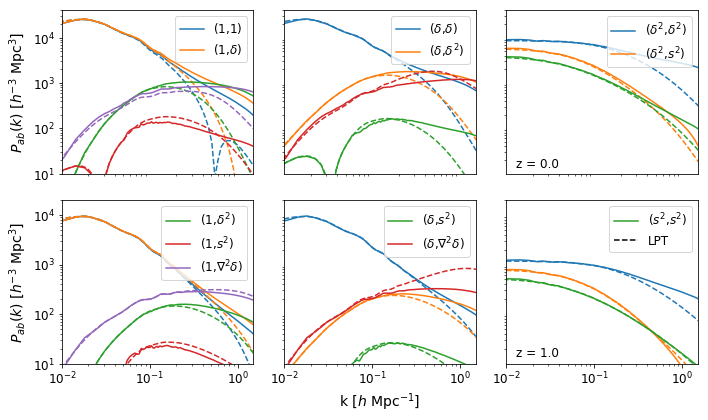

In [507]:
a = 0.5
z = 1./a - 1
spectra = np.loadtxt(spectra_files[1])
spectra[:,5] /= kfac
spectra[:,9] /= kfac
zelda  = zeldas[1]

#zelda = CLEFT(k,p*cosmo.iDz(z)**2,shear=True,one_loop=True); zelda.make_ptable(); kz = zelda.pktable[:,0]
cleft_dict = {(0,0):zelda.pktable[:,1]+zelda.pktable[:,2]+zelda.pktable[:,3],\
              (0,1):zelda.pktable[:,4]/2, (1,1):zelda.pktable[:,5],\
              (0,2):zelda.pktable[:,6], (1,2):zelda.pktable[:,7], (2,2):zelda.pktable[:,8]*4,\
              (0,3):zelda.pktable[:,9]/2, (1,3):zelda.pktable[:,10]/2, (2,3):zelda.pktable[:,11], (3,3):zelda.pktable[:,12],\
              (0,4):zelda.pktable[:,0]**2*zelda.pktable[:,1], (1,4):zelda.pktable[:,0]**2*zelda.pktable[:,5]}

ymin, ymax = 1e1, 2e4

plt.subplot(2,3,4)

ijs = [(0,0),(0,1),(0,2),(0,3),(0,4)]

for n, pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1
    
    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
        
    
    if n >= 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None

    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')
        
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')
plt.ylabel(r'$P_{ab}(k)$ [$h^{-3}$ Mpc$^{3}$]')
  

plt.subplot(2,3,5)

ijs = [(1,1),(1,2),(1,3),(1,4)]

for n, pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1
    
    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
        
    if n >= 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None
        
    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')
    
plt.yticks([])    
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')
plt.xlabel(r'k [$h$ Mpc$^{-1}$]')
    
plt.subplot(2,3,6)

ijs = [(2,2),(2,3),(3,3)]

for n,pair in enumerate(ijs):
    i, j, ind = spec_index(pair)
    
    fac_i, fac_j = 1, 1
    
    if i == 4:
        fac_i *= 10 
    if j == 4:
        fac_j *= 10
        
    if n >= 2:
        label = '('+comp_strs[i]+','+comp_strs[j]+')'
    else:
        label = None
    
    plt.loglog(spectra[:,0], fac_i * fac_j * np.abs(spectra[:,ind]),c=colors[n],label=label)
    plt.loglog(kz, fac_i * fac_j * np.abs(cleft_dict[pair]), c=colors[n],ls='--')
    
plt.loglog(kz,  0*kz, 'k--', label='LPT')
 
plt.text(1.3*xmin, 1.4*ymin, 'z = ' + str(z))
plt.yticks([])
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend(loc='upper right')
    
plt.tight_layout()

plt.savefig('./Figures/component_spectra_bigbox.pdf')
    
plt.show()

In [409]:
spec_index((0,4))

(0, 4, 5)

In [ ]:
# Make Example Spectra vs. the LPT Prediction
zelda = zeldas[0]
spectra = np.loadtxt(spectra_files[0])

cleft_dict = {(0,0):zelda.pktable[:,1]+zelda.pktable[:,2]+zelda.pktable[:,3],\
              (0,1):zelda.pktable[:,4]/2, (1,1):zelda.pktable[:,5],\
              (0,2):zelda.pktable[:,6], (1,2):zelda.pktable[:,7], (2,2):zelda.pktable[:,8]*4,\
              (0,3):zelda.pktable[:,9]/2, (1,3):zelda.pktable[:,10]/2, (2,3):zelda.pktable[:,11], (3,3):zelda.pktable[:,12],\
              (0,4):zelda.pktable[:,0]**2*zelda.pktable[:,1]/2, (1,4):zelda.pktable[:,0]**2*zelda.pktable[:,5]/2}


In [ ]:
def combine_nbody_components(spectra,b1,b2,bs,alpha):
    return (spectra[:,1] + 2*b1*spectra[:,2] + b1**2 * spectra[:,6] \
            + 2*b2*spectra[:,3] + 2*b1*b2*spectra[:,7] + b2**2 * spectra[:,10] \
            + 2*bs*spectra[:,4] + 2*b1*bs*spectra[:,8] + 2*b2*bs*spectra[:,11] + bs**2*spectra[:,12])
    

In [ ]:
b1, b2, bs, alpha= 2, 1, 0.6, 0

In [ ]:
kz, p0z = zelda.combine_bias_terms_pk([b1,0,0,0,0,0,0])
kz, pb = zelda.combine_bias_terms_pk([b1,b2,bs,0,0,0,0])

In [ ]:
plt.figure(figsize=(10,5))

plt.loglog(kz, pb )
plt.loglog(spectra[:,0], combine_nbody_components(spectra,b1,0.5*b2,bs,alpha))

plt.xlim(1e-2,1)
plt.ylim(8e2,4e5)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

pbinterp = np.interp(spectra[:,0],kz,pb+10.*zelda.pktable[:,1]*kz**2)

plt.semilogx(spectra[:,0], (pbinterp - combine_nbody_components(spectra,b1,0.5*b2,bs,alpha))/pbinterp )
plt.semilogx(kz, 0*kz, 'k--')


plt.xlim(1e-2,1)
plt.ylim(-0.2,0.2)


plt.show()

In [ ]:
plt.loglog(kz, np.abs(pb - p0z) )
plt.loglog(spectra[:,0], np.abs(combine_nbody_components(spectra,b1,0.5*b2,bs,alpha) - combine_nbody_components(spectra,b1,0,0,0)) )

plt.xlim(1e-2,1)
plt.ylim(3e0,4e5)
plt.show()

In [ ]:
# Make examples of a bunch of redshifts

In [719]:
def peak_background_bias(nu):
    """
    peak_background_bias(nu):
    Returns the Lagrangian biases, (b1,b2), given nu.
    This is helpful if we want to make our basis set f, nu and sFog.
    """
    delc = 1.686
    a    = 0.707
    p    = 0.30
    anu2 = a*nu**2
    b1   = (anu2-1+2*p/(1+anu2**p))/delc
    b2   = (anu2**2-3*anu2+2*p*(2*anu2+2*p-1)/(1+anu2**p))/delc**2
    return( (b1,b2) )

print(peak_background_bias(1.6))
print(peak_background_bias(1.75))
print(peak_background_bias(2.15))

bias_vals = [peak_background_bias(1.6),peak_background_bias(2.15)]

(0.6425222640790286, -0.4480882134858554)
(0.8485050090657764, -0.26892169091021567)
(1.4919166656899507, 0.8420011803335683)


In [838]:
alphas = [6,0.8,0.3]

/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


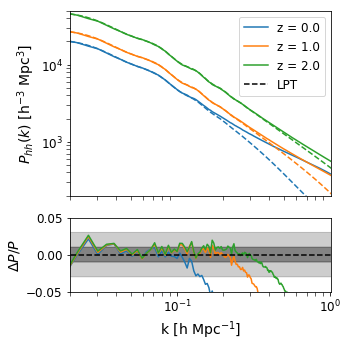

In [840]:
f, axs = plt.subplots(figsize=(5,5),ncols=1,nrows=2,gridspec_kw={'height_ratios':(2.5,1)})

biases = [(-1.12461172e-01,  2.13429557e-01,  2.75325256e-01),(6.92803384e-01, 1.48393321e-01, -1.14253620e+00)]


for ii, z in enumerate(zs):
    #b1, b2 = bias_vals[ii]; bs = b1/3.
    b1, b2, bs = biases[ii]
    spectra = np.loadtxt(spectra_files[ii])
    kz, pb = zeldas[ii].combine_bias_terms_pk([b1,b2,bs,alphas[ii],0,0,0])
    
    
    axs[0].loglog(spectra[:,0], combine_nbody_components(spectra,b1,0.5*b2,bs,0),c=colors[ii],label='z = %.1f'%(z))  
    axs[0].loglog(kz, pb, c=colors[ii], ls ='--' )

# do z = 2 separately
#zelda2 = CLEFT(k,p*cosmo.iDz(2)**2,shear=True,one_loop=True); zelda2.make_ptable()
b1, b2, bs = 2.20711130e+00,  1.34468425e+00, -4.12927500e+00
spectra = np.loadtxt('./LBEmulator/data/pc_z200_R0.txt')
kz, pb = zelda2.combine_bias_terms_pk([b1,b2,bs,alphas[2],0,0,0])

axs[0].loglog(spectra[:,0], combine_nbody_components(spectra,b1,0.5*b2,bs,0),c=colors[2],label='z = %.1f'%(2))  
axs[0].loglog(kz, pb, c=colors[2], ls ='--' )

    
axs[0].loglog(kz, -kz, 'k--',label='LPT')
    
axs[0].set_xticks([])
axs[0].set_xlim(2e-2,1.01)
axs[0].set_ylim(2e2,5e4)

axs[0].set_ylabel(r'$P_{hh}(k)$ [h$^{-3}$ Mpc$^3$]')

axs[0].legend()

for ii, z in enumerate(zs):
    #b1, b2 = bias_vals[ii]; bs = b1/3.
    b1, b2, bs = biases[ii]
    spectra = np.loadtxt(spectra_files[ii])
    kz, pb = zeldas[ii].combine_bias_terms_pk([b1,b2,bs,alphas[ii],0,0,0])
    pbinterp = np.interp(spectra[:,0],kz,pb)
    
    axs[1].semilogx(spectra[:,0],pbinterp/combine_nbody_components(spectra,b1,0.5*b2,bs,0)-1.0)
    axs[1].fill_between(spectra[:,0],-0.03,0.03,color='k',alpha=0.1)
    axs[1].fill_between(spectra[:,0],-0.01,0.01,color='k',alpha=0.2)

# do z = 2 separately
b1, b2, bs = 2.20711130e+00,  1.34468425e+00, -4.12927500e+00
spectra = np.loadtxt('./LBEmulator/data/pc_z200_R0.txt')
kz, pb = zelda2.combine_bias_terms_pk([b1,b2,bs,alphas[2],0,0,0])
pbinterp = np.interp(spectra[:,0],kz,pb)
axs[1].semilogx(spectra[:,0],pbinterp/combine_nbody_components(spectra,b1,0.5*b2,bs,0)-1.0)
    
axs[1].semilogx(kz, 0*kz, 'k--')   

axs[1].set_yticks([-0.05,0,0.05])

axs[1].set_xlim(2e-2,1.01)
axs[1].set_ylim(-0.05,0.05)  

axs[1].legend()

axs[1].set_ylabel(r'$\Delta P/P$')
axs[1].set_xlabel(r'k [h Mpc$^{-1}$]')

axs[0].tick_params(which='minor', length=4)
axs[1].tick_params(which='minor', length=4)

plt.tight_layout()

plt.savefig('./Figures/lpt_comparison.pdf')

plt.show()

In [828]:
1/cosmo.iDz(2)**2

5.702341195303717

In [ ]:
# Fit halo spectra

In [644]:
Mbins = [12.5, 13.0]
#halo_files = [['./LBEmulator/code/output/cm_lowres-20stepB1/pk-10000-1024-0512-13.0.txt',\
#               './LBEmulator/code/output/cm_lowres-20stepB1/pk-10000-1024-0512-13.5.txt'],
#             ['./LBEmulator/code/output/cm_lowres-20stepB1/pk-5000-1024-0512-13.0.txt',\
#               './LBEmulator/code/output/cm_lowres-20stepB1/pk-5000-1024-0512-13.5.txt']]

halo_files = [['./LBEmulator/data/ph_12.50_13.00_z000.txt',\
               './LBEmulator/data/ph_13.00_13.50_z000.txt'],\
              ['./LBEmulator/data/ph_12.50_13.00_z100.txt',\
               './LBEmulator/data/ph_13.00_13.50_z100.txt']]

spectra_files  = ['./LBEmulator/data/pc_z000_R0.txt','./LBEmulator/data/pc_z100_R0.txt']

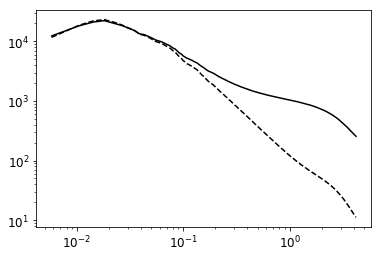

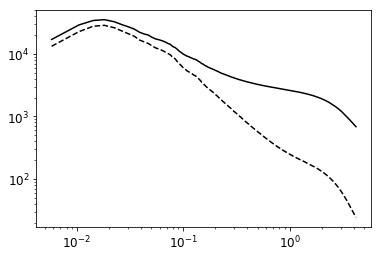

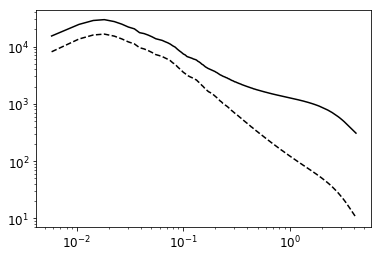

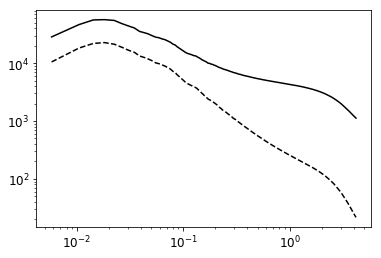

In [17]:
for halo_file_tup in halo_files:
    for halo_file in halo_file_tup:
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_file).T
        
        plt.loglog(k,phh,'k')
        plt.loglog(k,phm,'k--')
        plt.show()

In [18]:
from scipy.optimize import curve_fit

def combine_nbody_components(spectra,b1,b2,bs,alpha):
    
    model = (spectra[:,1] + 2*b1*spectra[:,2] + b1**2 * spectra[:,6] \
            + 2*b2*spectra[:,3] + 2*b1*b2*spectra[:,7] + b2**2 * spectra[:,10] \
            + 2*bs*spectra[:,4] + 2*b1*bs*spectra[:,8] + 2*b2*bs*spectra[:,11] + bs**2*spectra[:,12]\
            + 2*alpha*spectra[:,5] + 2*b1*alpha*spectra[:,9])
    return model

def getmodel_interp(k, spec, b1,b2,bs,alpha):
    return np.interp(k, spec[:,0], combine_nbody_components(spec,b1,b2,bs,alpha))


def fitmodel(spec, k, pk, kmax=0.5):
    dk = k[5] - k[4]; dV = k**2 * dk
    krange = (k > 0.01) * (k < kmax)
    sigmas = np.sqrt(2*pk**2/dV)
    
    func = lambda x, b1, b2, bs, alpha, s: s + getmodel_interp(x, spec, b1,b2,bs,alpha)
    res = curve_fit(func,k[krange],pk[krange],p0=[0,0,0,0,1000],sigma=sigmas[krange])[0]
    
    
    return res, k, func(k,*res)


#combine_nbody_components(spectra,0,0,0,0)


In [19]:
spec_index((1,4))

(1, 4, 9)

In [20]:
# Do an example
spectra = np.loadtxt(spectra_files[0])
k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[0][0]).T

kmaxs = [ 0.2, 0.4, 0.6, 0.8]

for kmax in kmaxs:

    a, b, c = fitmodel(spectra, k, ph, kmax = kmax)
    plt.loglog(b,c,label=r'$k_{\rm max} = $ %.2f' %(kmax))

plt.loglog(k,ph,'k')

plt.legend()

plt.show()


NameError: name 'ph' is not defined

In [50]:
f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

counter = 0
for ii, z in enumerate(zs):
    
    
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mmin in enumerate(Mbins):
        print(ii,jj,counter)
        k, ph, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        axs[2*ii,jj].loglog(k,ph,'k')
        
        for kk, kmax in enumerate(kmaxs):
            a, b, c = fitmodel(spectra, k, ph, kmax = kmax)
            print(a)
            axs[2*ii,jj].loglog(b,c)
            axs[2*ii,jj].tick_params(labelsize=24)
            axs[2*ii+1,jj].semilogx(k,(c-ph)/ph)
            axs[2*ii,jj].tick_params(labelsize=24)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.01,1.5)
        axs[2*ii+1,jj].set_xlim(0.01,1.5)
        axs[2*ii,jj].set_ylim(0.5*np.min(ph[plotrange]),1.5*np.max(ph))
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.012, 0.65*np.min(ph[plotrange]), r'(z, $M_{\rm min}$) = (%.1f, %.1f)' %(z,Mmin))
        


            
# Do labels and axis labels separately

axs[0,0].loglog(k, k, c='k', label=r'$P_{hh}$')
axs[0,0].legend()

axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
axs[0,1].legend()

axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel('k')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel('P(k)')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
plt.tight_layout()

#plt.savefig('./Figures/halo_pk_fits.pdf')

plt.show()

0 0 0
[-1.13080366e-01 -2.63351543e-01 -1.70596978e-01 -1.45306854e+00
  6.71270795e+02]
0 1 0
[ 1.16814963e-01 -5.24474052e-01  2.40848662e-01 -3.32782779e+00
  1.88094423e+03]
1 0 0
[ 6.99339317e-01 -3.58282146e-02 -1.26640992e+00 -2.12107339e+00
  6.38665994e+02]
1 1 0
[ 1.36873197e+00  4.58232300e-01 -1.63383701e+00 -4.46301819e-02
  3.35440776e+03]


IndexError: list index out of range

In [ ]:
np.loadtxt(halo_files[ii][jj]).shape

In [ ]:
# Join Fit of Cross and Auto Spectra

In [801]:
def combine_nbody_components(spectra,b1,b2,bs,alpha,auto=True):
    
    if auto:
        model = (spectra[:,1] + 2*b1*spectra[:,2] + b1**2 * spectra[:,6] \
            + 2*b2*spectra[:,3] + 2*b1*b2*spectra[:,7] + b2**2 * spectra[:,10] \
            + 2*bs*spectra[:,4] + 2*b1*bs*spectra[:,8] + 2*b2*bs*spectra[:,11] + bs**2*spectra[:,13]\
            + 2*alpha*spectra[:,5] + 2*b1*alpha*spectra[:,9] + 2*b2*alpha*spectra[:,12] + 2*bs*alpha*spectra[:,14])
    else:
        model = (spectra[:,1] + b1*spectra[:,2] \
            + b2*spectra[:,3] \
            + bs*spectra[:,4] \
            + alpha*spectra[:,5])
    return model

def getmodel_interp(k, spec, b1,b2,bs,alpha,auto=True):
    return np.interp(k, spec[:,0], combine_nbody_components(spec,b1,b2,bs,alpha,auto=auto))

def getmodel_joint(k,spec,b1,b2,bs,alpha,s):
    return np.concatenate( (s+getmodel_interp(k,spec,b1,b2,bs,alpha,auto=True),getmodel_interp(k,spec,b1,b2,bs,alpha,auto=False))  )

def simple_bias_model(k, spec, s, a0, a1, a2):
    bias = a0 + a1*spectra[:,0] + a2*spectra[:,0]**2
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def linear_bias_model(k, spec, s, b): 
    bias = b 
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def fitmodel_joint(spec, k, phh, phm, kmax=0.5, model='lemu'):
    dk = k[5] - k[4]; dV = k**2 * dk
    krange = (k > 0.02) * (k < kmax)
    
    pmm = np.interp(k, spec[:,0], spec[:,1])
    #c_hh = (2 * phh**2 / dV)[krange]
    #c_hm = ((phh * pmm + phm**2) / dV)[krange]
    #c_x  = (2 * phh * phm / dV)[krange]
    
    c_hh = (1 / dV)[krange]
    c_hm = (1/ dV)[krange]
    c_x  = (0 / dV)[krange]
    
    N = np.sum(krange)
    cov = np.zeros((2*N,2*N))
    cov[0:N,0:N] = np.diag(c_hh)
    cov[N:,N:] = np.diag(c_hm)
    cov[0:N,N:] = np.diag(c_x); cov[N:,0:N] = np.diag(c_x)
    
    #sigmas = np.sqrt(2*pk**2/dV)
    
    if model == 'lemu':
        func = lambda x, b1, b2, bs, alpha, s: getmodel_joint(x, spec, b1,b2,bs,alpha,s)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                    ,p0=[0,0,0,0,1000], sigma = cov)[0]
    elif model == 'simple':
        print('Fitting using model' + model)
        func = lambda x, s, a0, a1, a2: simple_bias_model(x, spec, s, a0, a1, a2)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1,0,0], sigma = cov)[0]
    else:
        print('Fitting using model' + model)
        func = lambda x, s, a0: linear_bias_model(x, spec, s, a0)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1], sigma = cov)[0]
    
    
    return res, k, func(k,*res)


In [802]:
spectra = np.loadtxt('./LBEmulator/data/pc_z200_R0.txt')
k, phh, pherr, phm, phmerr = np.loadtxt('./LBEmulator/data/ph_12.50_13.00_z200.txt').T
ph.shape

(1023,)

In [803]:
print(spectra_files)
print(halo_files)
for kmax in [0.2,0.4,0.6]:
    a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
    print(kmax,a)

['./LBEmulator/data/pc_z000_R0.txt', './LBEmulator/data/pc_z100_R0.txt']
[['./LBEmulator/data/ph_12.00_12.50_z000.txt', './LBEmulator/data/ph_12.50_13.00_z000.txt', './LBEmulator/data/ph_13.00_13.50_z000.txt'], ['./LBEmulator/data/ph_12.00_12.50_z100.txt', './LBEmulator/data/ph_12.50_13.00_z100.txt', './LBEmulator/data/ph_13.00_13.50_z100.txt']]
0.2 [ 2.19628286e+00  1.16030491e+00 -4.47010603e+00  3.38453825e-01
  2.01032159e+03]
0.4 [ 2.19094746e+00  9.38570040e-01 -4.27210550e+00 -5.86897894e-01
  2.04503714e+03]
0.6 [ 2.19925307e+00  1.18923569e+00 -4.31847287e+00 -1.08665084e-01
  1.98236058e+03]


In [804]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)

a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=0.7)

plt.loglog(k,phh,'k', label=r'$P_{hh}$')
plt.loglog(b,c[:1023])

plt.loglog(k,phm,'k--', label=r'$P_{hm}$')
plt.loglog(b,c[1023:])

plt.legend()

plt.ylabel('P(k)')

plt.xlim(1e-2,1)
plt.ylim(1.5e2,3e4)


(150.0, 30000.0)

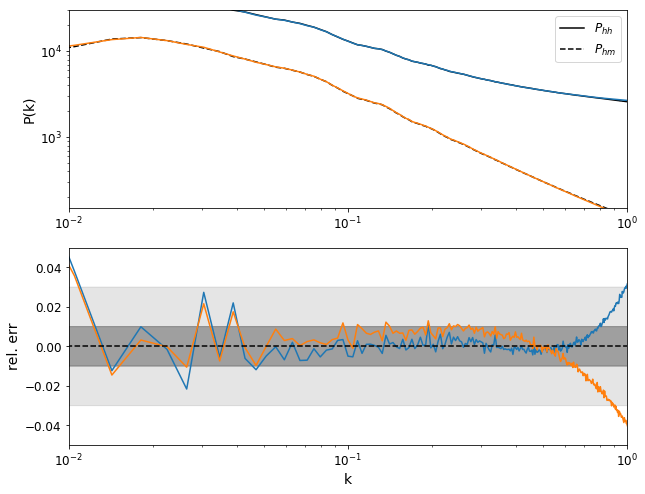

In [805]:
plt.subplot(2,1,2)

plt.semilogx(k,(c[:1023]-phh)/phh)
plt.semilogx(k,(c[1023:]-phm)/phm)

plt.semilogx(k,0*k,'k--')
plt.fill_between(k, -0.03, 0.03, color='k',alpha=0.1)
plt.fill_between(k, -0.01, 0.01, color='k',alpha=0.3)

plt.ylabel('rel. err')

plt.xlabel('k')

plt.xlim(1e-2,1)
plt.ylim(-0.05,0.05)

plt.savefig('./Figures/jointfit_rough_z2_M_12p5_13p0.pdf')

plt.show()

In [806]:
print(a)

[ 2.20711130e+00  1.34468425e+00 -4.12927500e+00  1.29920434e-01
  1.95364914e+03]


0 0 0
[-1.12461172e-01  2.13429557e-01  2.75325256e-01  4.30605939e+00
  1.00271569e+03]
0 1 1
[ 9.74715299e-02 -1.45589610e-01 -4.40532103e-01  1.88038707e+00
  2.91140198e+03]
1 0 2
[ 6.92803384e-01  1.48393321e-01 -1.14253620e+00  1.63201277e+00
  1.14442616e+03]
1 1 3
[ 1.36006877e+00  7.74533409e-01 -3.71849915e-01  1.53066438e+00
  3.38658536e+03]


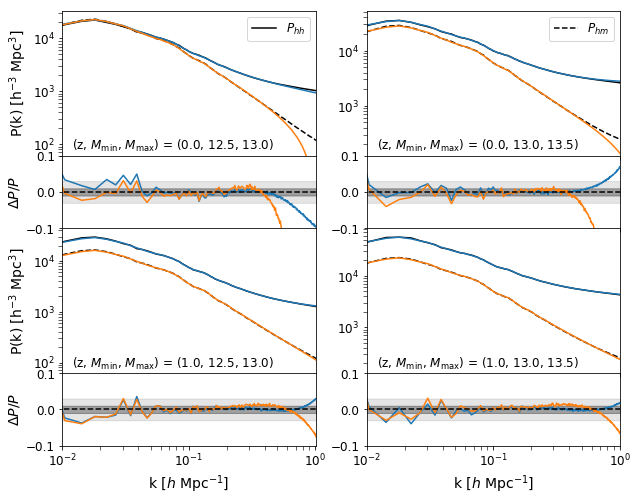

In [474]:
Mbins = [(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'hspace':0.0,'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

kmaxs = [0.5]

sns = [1052.32765772, 2819.38427067, 1272.75374832, 4607.39656341]

counter = 0
for ii, z in enumerate(zs):
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mbin in enumerate(Mbins):
        print(ii,jj,counter)
        #sn = sns[ii]
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        #phh -= sn
        #axs[2*ii,jj].loglog(k,phh,'k')
        #axs[2*ii,jj].loglog(k,phm,'k--')
        
        for kk, kmax in enumerate(kmaxs):
            
            kmax = (z > 0.1) * 0.8 + (z<=0.1)*0.45
            
            a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
            phhemu = c[:1023]
            phmemu = c[1023:]
            
            axs[2*ii,jj].loglog(k,phh,'k')
            axs[2*ii,jj].loglog(k,phm,'k--')
            
            print(a)
            axs[2*ii,jj].loglog(b,phhemu)
            axs[2*ii,jj].loglog(b,phmemu)
            axs[2*ii+1,jj].semilogx(k,(phhemu-phh)/phh)
            axs[2*ii+1,jj].semilogx(k,(phmemu-phm)/phm)
            
            axs[2*ii,jj].tick_params(which='minor', length=4)
            axs[2*ii+1,jj].tick_params(which='minor', length=4)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.01,1.01)
        axs[2*ii+1,jj].set_xlim(0.01,1.01)
        axs[2*ii,jj].set_ylim(0.5*np.min(phm[plotrange]),1.5*np.max(phh))
        
        axs[2*ii+1,jj].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
        axs[2*ii+1,jj].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.012, 0.65*np.min(phm[plotrange]), r'(z, $M_{\rm min}$, $M_{\rm max}$) = (%.1f, %.1f, %.1f)' %(z,*Mbin))
        
        counter += 1

            
# Do labels and axis labels separately

axs[0,0].loglog(k, k, c='k', label=r'$P_{hh}$')
axs[0,0].legend()

axs[0,1].loglog(k, k, c='k', ls='--', label=r'$P_{hm}$')
axs[0,1].legend()


#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
#plt.tight_layout()

plt.savefig('./Figures/halo_pk_fits_sn.pdf')

plt.show()

In [ ]:
# Try Three Sets

In [646]:
halo_files = [['./LBEmulator/data/ph_12.00_12.50_z000.txt',\
            './LBEmulator/data/ph_12.50_13.00_z000.txt',\
               './LBEmulator/data/ph_13.00_13.50_z000.txt'],\
              ['./LBEmulator/data/ph_12.00_12.50_z100.txt',\
               './LBEmulator/data/ph_12.50_13.00_z100.txt',\
               './LBEmulator/data/ph_13.00_13.50_z100.txt']]

spectra_files  = ['./LBEmulator/data/pc_z000_R0.txt','./LBEmulator/data/pc_z100_R0.txt']

0 (12.0, 12.5) [-0.20076952 -0.27830874  0.05567386] 298.91044586299404
0 (12.5, 13.0) [-0.11246117  0.21342956  0.27532526] 1002.715691755076
0 (13.0, 13.5) [ 0.09747153 -0.14558961 -0.4405321 ] 2911.401980181507
1.0 (12.0, 12.5) [ 0.30333525 -0.05496424 -0.81199006] 445.9655241879197
1.0 (12.5, 13.0) [ 0.69280338  0.14839332 -1.1425362 ] 1144.4261619258623
1.0 (13.0, 13.5) [ 1.36006877  0.77453341 -0.37184992] 3386.58535556744


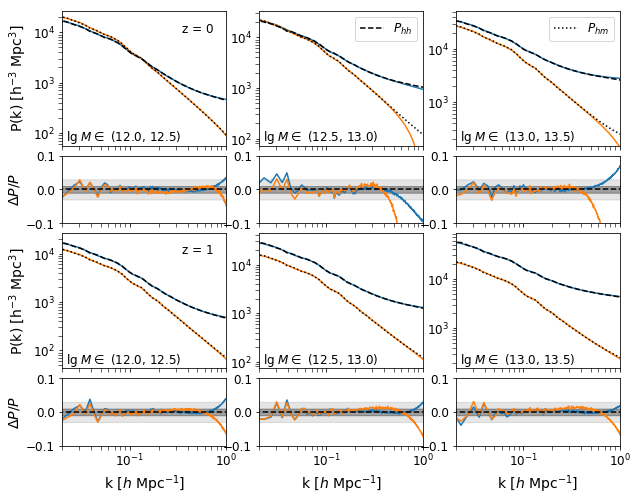

In [606]:
Mbins = [(12.0,12.5),(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'hspace':0.1,'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

kmaxs = [0.5]

sns = [1052.32765772, 2819.38427067, 1272.75374832, 4607.39656341]

counter = 0
for ii, z in enumerate(zs):
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mbin in enumerate(Mbins):
        #print(ii,jj,counter)
        #sn = sns[ii]
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        #phh -= sn
        #axs[2*ii,jj].loglog(k,phh,'k')
        #axs[2*ii,jj].loglog(k,phm,'k--')
        
        for kk, kmax in enumerate(kmaxs):
            
            kmax = (z > 0.1) * 0.8 + (z<=0.1)*0.45
            
            if jj == 0:
                kmax = 0.75
            
            a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
            phhemu = c[:1023]
            phmemu = c[1023:]
                        
            print(z,Mbin,a[:3],a[-1])
            
            axs[2*ii,jj].loglog(b,phhemu)
            axs[2*ii,jj].loglog(b,phmemu)
            
            axs[2*ii,jj].loglog(k,phh,'k--')
            axs[2*ii,jj].loglog(k,phm,'k:')
            
            axs[2*ii+1,jj].semilogx(k,(phhemu-phh)/phh)
            axs[2*ii+1,jj].semilogx(k,(phmemu-phm)/phm)
            
            axs[2*ii,jj].tick_params(which='minor', length=4)
            axs[2*ii+1,jj].tick_params(which='minor', length=4)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.02,1.01)
        axs[2*ii+1,jj].set_xlim(0.02,1.01)
        axs[2*ii,jj].set_ylim(0.6*np.min(phm[plotrange]),1.5*np.max(phh))
        
        axs[2*ii+1,jj].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
        axs[2*ii+1,jj].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.022, 0.75*np.min(phm[plotrange]), r'${\rm lg}\ M \in$ (%.1f, %.1f)' %(Mbin[0],Mbin[1]))
        
        counter += 1

            
# Do labels and axis labels separately

axs[0,1].loglog(k, k, c='k',ls='--', label=r'$P_{hh}$')
axs[0,1].legend()

axs[0,2].loglog(k, k, c='k', ls=':', label=r'$P_{hm}$')
axs[0,2].legend()

axs[0,0].text(0.35,1e4,'z = 0')
axs[2,0].text(0.35,1e4,'z = 1')

#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
#plt.tight_layout()

plt.savefig('./Figures/halo_pk_fits_test.pdf')

plt.show()

In [509]:
cosmo.iDz(1)

0.6086762209388068

In [ ]:
# Investigate Biases

0 (12.5, 13.0)
0 0 0


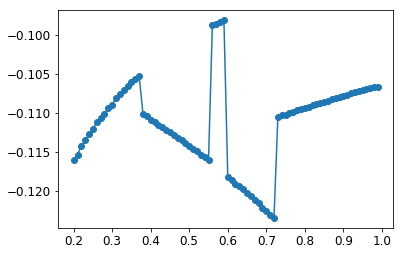

0 (13.0, 13.5)
0 1 0


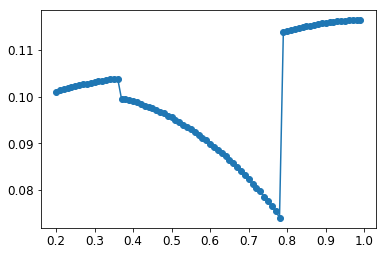

1.0 (12.5, 13.0)
1 0 0


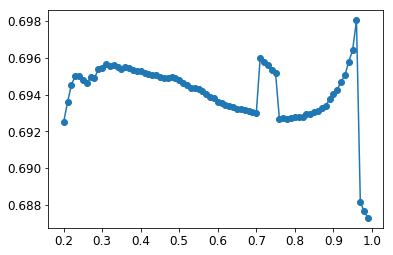

1.0 (13.0, 13.5)
1 1 0


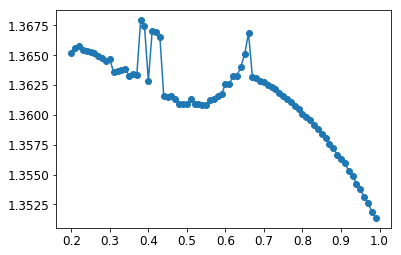

In [353]:
b1s = []
kmaxs = np.arange(0.2,1.0,0.01)

counter = 0
for ii, z in enumerate(zs):
    
    dats = np.zeros_like(kmaxs)
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mbin in enumerate(Mbins):
        print(z,Mbin)
        print(ii,jj,counter)
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        
        for kk, kmax in enumerate(kmaxs):
            
            #kmax = (z > 0.1) * 0.7 + (z<=0.1)*0.45
            
            a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
            dats[kk] = float(a[0])
            
        plt.plot(kmaxs,dats,'o-')
        plt.show()

In [89]:
# Look at the galaxies
pks[0][0].shape

(1024,)

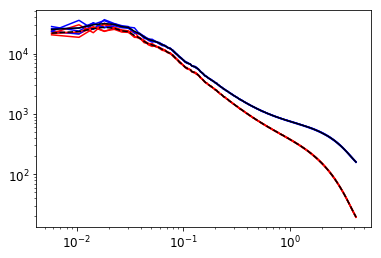

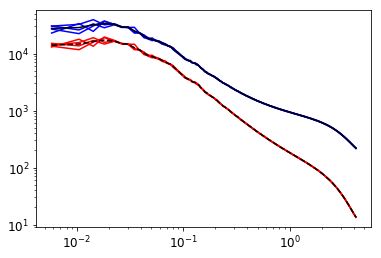

In [511]:
zs = [0, 1.0]
zfiles = ['./LBEmulator/data/pg-%d-10000-1536-2048-gal.txt',\
          './LBEmulator/data/pg-%d-5000-1536-2048-gal.txt']
seeds = [9202, 9204, 9206, 9208]

pks = []

for ii, z in enumerate(zs):
    dats1 = []
    dats2 = []
    for seed in seeds:
        fname = zfiles[ii] %(seed)
        k, phh, phm = np.loadtxt(fname).T
        plt.loglog(k, phh,'b')
        plt.loglog(k, phm,'r')
        
        dats1 += [phh[1:]]
        dats2 += [phm[1:]]
    
    pks += [[k[1:], np.mean(dats1,axis=0), np.mean(dats2,axis=0)]]
    
    plt.loglog(k[1:], pks[ii][1],'k')
    plt.loglog(k[1:], pks[ii][2],'k--')
        
    plt.show()


0 0 0
[1.40690687e-01 4.41875475e-02 3.73187546e-01 1.47238508e+00
 3.24128908e+02]
1 0 0
[ 9.23482918e-01  9.71046441e-02 -7.53957397e-01  1.74761403e-01
  4.96832911e+02]


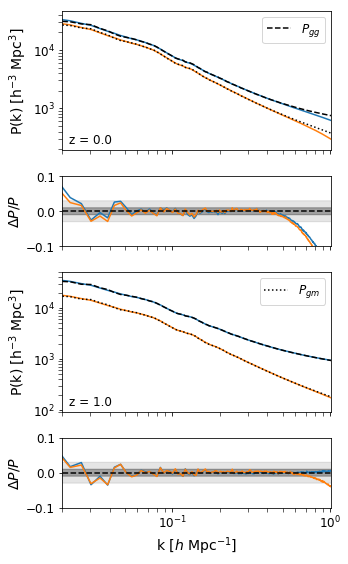

In [515]:
zs = [0, 1.0]
zfiles = ['./LBEmulator/data/pg-%d-10000-1536-2048-gal.txt','./LBEmulator/data/pg-%d-5000-1536-2048-gal.txt']

Mbins = [(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(5,8),ncols=1,nrows=4,gridspec_kw={'height_ratios':(2,1)*2})

kmaxs = [0.5]

counter = 0
for ii, z in enumerate(zs):
    
    spectra = np.loadtxt(spectra_files[ii])

    print(ii,jj,counter)
    k, phh, phm = pks[ii]
    plotrange = (k > 0.01) * (k<1.)
    

                
    kmax = (z > 0.1) * 0.7 + (z<=0.1)*0.45
            
    a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax,model='lemu')
    phhemu = c[:1023]
    phmemu = c[1023:]
            
    print(a)
    jj = 0
    axs[2*ii].loglog(k,phhemu)
    axs[2*ii].loglog(k,phmemu)
    axs[2*ii].loglog(k,phh,'k--')
    axs[2*ii].loglog(k,phm,'k:')
    
    axs[2*ii+1].semilogx(k,(phhemu-phh)/phh)
    axs[2*ii+1].semilogx(k,(phmemu-phm)/phm)
    
            
    axs[2*ii].tick_params(which='minor', length=4)
    axs[2*ii+1].tick_params(which='minor', length=4)

        
    axs[2*ii+1].semilogx(k, 0*k, 'k--')
         
    axs[2*ii].set_xlim(0.02,1.01)
    axs[2*ii+1].set_xlim(0.02,1.01)
    axs[2*ii].set_ylim(0.5*np.min(phm[plotrange]),1.5*np.max(phh))
        
    axs[2*ii+1].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
    axs[2*ii+1].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
    axs[2*ii+1].set_ylim(-0.1,0.1)
        
    axs[2*ii].text(0.022, 0.65*np.min(phm[plotrange]), r'z = %.1f' %(z))
        


            
# Do labels and axis labels separately

axs[0].loglog(k, k, c='k',ls='--', label=r'$P_{gg}$')
axs[0].legend()

axs[2].loglog(k, k, c='k', ls=':', label=r'$P_{gm}$')
axs[2].legend()


#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            

axs[-1].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    axs[2*ii].set_xticklabels([])
    if ii != (len(zs)-1):
        axs[2*ii+1].set_xticklabels([])
    
plt.tight_layout()

plt.savefig('./Figures/gal_pk_fits.pdf')

plt.show()

In [ ]:
# Compare with the simple model

0 0 0
Fitting using modelsimple
Fitting using modellinear
[ 9.34046430e-02 -1.26211143e-01 -4.94495777e-01  2.00300802e+00
  2.90652623e+03] [ 2.95349609e+03  1.13802359e+00 -8.04852345e-02 -1.92351798e+00] [2.58689024e+03 1.13779892e+00]


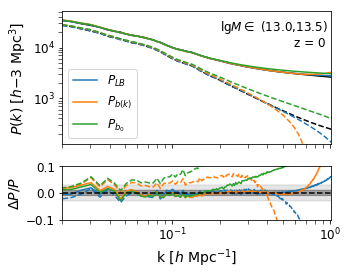

[ 9.34046430e-02 -1.26211143e-01 -4.94495777e-01  2.00300802e+00
  2.90652623e+03] [ 2.95349609e+03  1.13802359e+00 -8.04852345e-02 -1.92351798e+00]


In [651]:
f, axs = plt.subplots(figsize=(5,4),ncols=1,nrows=2,gridspec_kw={'height_ratios':(2.5,1)})

counter = 0
ii = 0; jj = 0
    
spectra = np.loadtxt(spectra_files[ii])

print(ii,jj,counter)
k, phh, phherr, phm, phmerr = np.loadtxt('./LBEmulator/data/ph_13.00_13.50_z000.txt').T
plotrange = (k > 0.01) * (k<1.)
    
axs[0].loglog(k,phh,'k')
axs[0].loglog(k,phm,'k--')
                
kmax = (z > 0.1) * 0.7 + (z<=0.1)*0.45
            
a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=0.5,model='lemu')
d,e,f = fitmodel_joint(spectra,k,phh,phm,kmax=0.5,model='simple')
x,y,z = fitmodel_joint(spectra,k,phh,phm,kmax=0.2,model='linear')

print(a,d,x)

phhemu = c[:1023]
phmemu = c[1023:]

phhsim = f[:1023]
phmsim = f[1023:]

phhlin = z[:1023]
phmlin = z[1023:]


#bias_fac = (phm/spectra[:,1])
#phhemu = bias_fac**2 * spectra[:,1] + 600
#phmemu = bias_fac * spectra[:,1]


axs[0].loglog(k,phhemu,'C0',label=r'$P_{LB}$')
axs[0].loglog(k,phmemu,'C0--')

axs[0].loglog(k,phhsim,'C1',label=r'$P_{b(k)}$')
axs[0].loglog(k,phmsim,'C1--')

axs[0].loglog(k,phhlin,'C2',label=r'$P_{b_0}$')
axs[0].loglog(k,phmlin,'C2--')


axs[1].semilogx(k,(phhemu-phh)/phh,'C0')
axs[1].semilogx(k,(phmemu-phm)/phm,'C0--')

axs[1].semilogx(k,(phhsim-phh)/phh,'C1')
axs[1].semilogx(k,(phmsim-phm)/phm,'C1--')

axs[1].semilogx(k,(phhlin-phh)/phh,'C2')
axs[1].semilogx(k,(phmlin-phm)/phm,'C2--')

axs[0].legend()
            
axs[0].tick_params(which='minor', length=4)
axs[1].tick_params(which='minor', length=4)


axs[0].set_xticklabels([])
        
axs[1].semilogx(k, 0*k, 'k--')
         
axs[0].set_xlim(0.02,1.01)
axs[1].set_xlim(0.02,1.01)
axs[0].set_ylim(0.5*np.min(phm[plotrange]),1.5*np.max(phh))
        
axs[1].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
axs[1].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
axs[1].set_ylim(-0.1,0.1)

axs[0].set_ylabel(r'$P(k)$ [$h{-3}$ Mpc$^{3}$]')
axs[1].set_ylabel(r'$\Delta P/P$')
axs[1].set_xlabel(r'k [$h$ Mpc$^{-1}$]')
        
axs[0].text(0.20, 0.6*np.max(phh[plotrange]), r'${\rm lg}M \in$ (%.1f,%.1f)' %(13.0,13.5))
axs[0].text(0.59, 0.3*np.max(phh[plotrange]), r'z = %d' %(zs[ii]))

plt.tight_layout()

#plt.savefig('./Figures/simple_model.pdf')

plt.show()

print(a,d)


0 0 0


/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


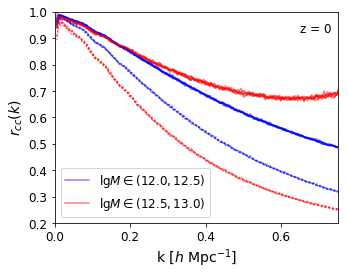

In [711]:
plt.figure(figsize=(5,4))

counter = 0
ii = 0; jj = 0
    
spectra = np.loadtxt(spectra_files[ii])

print(ii,jj,counter)

sn1 = 298.91044586299404
sn2 = 1002.715691755076

for seed in [9200,9201,9203,9205,9207,9209]:

    if seed == 9200:
        label1 = r'${\rm lg}M \in (12.0,12.5)$'
        label2 =  r'${\rm lg}M \in (12.5,13.0)$'
    else:
        label1, label2 = None, None
    
    #k, phh, phherr, phm, phmerr = np.loadtxt('./LBEmulator/data/ph_13.00_13.50_z000_%d.txt' %(seed)).T
    spectra = np.loadtxt('./LBEmulator/data/pc_z000_R0_%d.txt'%(seed))
    k, phh, phm = np.loadtxt('./LBEmulator/data/ph_12.00_12.50_z000_%d.txt' %(seed)).T
    plt.plot(k,phm/np.sqrt((phh-sn1)*spectra[:,1]),'b',alpha=0.5,label=label1)
    plt.plot(k,phm/np.sqrt((phh)*spectra[:,1]),'b:',alpha=0.5)
    
    k, phh, phm = np.loadtxt('./LBEmulator/data/ph_12.50_13.00_z000_%d.txt' %(seed)).T
    plt.plot(k,phm/np.sqrt((phh-sn2)*spectra[:,1]),'r',alpha=0.5,label=label2)
    plt.plot(k,phm/np.sqrt((phh)*spectra[:,1]),'r:',alpha=0.5)

plt.xlim(0.00,0.75)
plt.ylim(0.2,1.00)
plt.xscale('linear')
        
#axs[1].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
#axs[1].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
#axs[1].set_ylim(-0.1,0.1)

plt.ylabel(r'$r_{cc}(k)$')
plt.xlabel(r'k [$h$ Mpc$^{-1}$]')
plt.text(0.65,0.92,'z = 0')

#plt.text(0.20, 0.6*np.max(phh[plotrange]), r'${\rm lg}M \in$ (%.1f,%.1f)' %(13.0,13.5))
#plt.text(0.59, 0.3*np.max(phh[plotrange]), r'z = %d' %(zs[ii]))

plt.legend()
plt.tight_layout()


plt.savefig('./Figures/rk.pdf')

plt.show()


0 0 0


/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


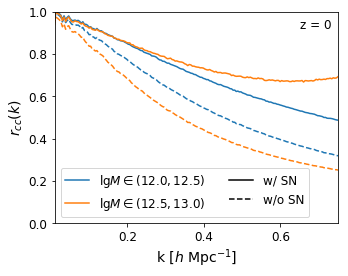

In [834]:
plt.figure(figsize=(5,4))

counter = 0
ii = 0; jj = 0
    
spectra = np.loadtxt(spectra_files[ii])

print(ii,jj,counter)

sn1 = 298.91044586299404
sn2 = 1002.715691755076

label1 = r'${\rm lg}M \in (12.0,12.5)$'
label2 =  r'${\rm lg}M \in (12.5,13.0)$'

k, phh, phherr, phm, phmerr = np.loadtxt('./LBEmulator/data/ph_12.00_12.50_z000.txt' ).T
plt.plot(k,phm/np.sqrt((phh-sn1)*spectra[:,1]),'C0',label=label1)
plt.plot(k,phm/np.sqrt((phh)*spectra[:,1]),'C0--')
    
k, phh,phherr, phm,phmerr = np.loadtxt('./LBEmulator/data/ph_12.50_13.00_z000.txt' ).T
plt.plot(k,phm/np.sqrt((phh-sn2)*spectra[:,1]),'C1',label=label2)
plt.plot(k,phm/np.sqrt((phh)*spectra[:,1]),'C1--')

plt.plot(k,-k, 'k',label='w/ SN')
plt.plot(k,-k, 'k--',label='w/o SN')

plt.xlim(0.01,0.75)
plt.ylim(0.0,1.00)
plt.xscale('linear')
        
#axs[1].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
#axs[1].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
#axs[1].set_ylim(-0.1,0.1)

plt.ylabel(r'$r_{cc}(k)$')
plt.xlabel(r'k [$h$ Mpc$^{-1}$]')
plt.text(0.65,0.92,'z = 0')

#plt.text(0.20, 0.6*np.max(phh[plotrange]), r'${\rm lg}M \in$ (%.1f,%.1f)' %(13.0,13.5))
#plt.text(0.59, 0.3*np.max(phh[plotrange]), r'z = %d' %(zs[ii]))

plt.legend(ncol=2)
plt.tight_layout()


plt.savefig('./Figures/rk.pdf')

plt.show()


/Users/sschen/anaconda/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


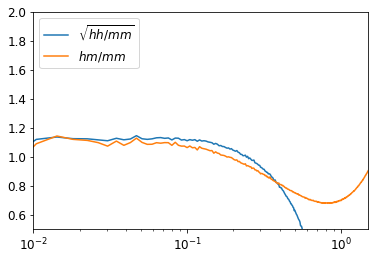

In [334]:
plt.semilogx(k, np.sqrt((phh-2954)/spectra[:,1]),label=r'$\sqrt{hh/mm}$' )
plt.semilogx(k, phm/spectra[:,1],label=r'$hm/mm$' )
#plt.loglog(k, spectra[:,1])

#plt.plot(k,a[1] + a[2]*k +a[3]*k**2)

plt.ylim(0.5,2)
plt.xlim(1e-2,1.5)



#plt.ylim(100,100000)
#plt.xlim(1e-2,1)

plt.legend()

plt.savefig('./Figures/ratios.pdf')

plt.show()

In [561]:
# Let's see if we can use LPT:

In [569]:
def lpt_spectrum_model(k, zelda, b1, b2, bs, alpha, auto=True):
    if auto:
        model = (1 + alpha*zelda.pktable[:,0]**2)*zelda.pktable[:,1] + zelda.pktable[:,2] + zelda.pktable[:,3] \
        + b1*zelda.pktable[:,4] + b1**2*zelda.pktable[:,5] + b2*zelda.pktable[:,6]\
        + b1*b2*zelda.pktable[:,7] + b2**2*zelda.pktable[:,8] + bs*zelda.pktable[:,9]\
        + b1*bs*zelda.pktable[:,10] + b2*bs*zelda.pktable[:,11] + bs**2*zelda.pktable[:,12]
        
    else:
        model = (1 + alpha*zelda.pktable[:,0]**2)*zelda.pktable[:,1] + zelda.pktable[:,2] + zelda.pktable[:,3] \
        + 0.5*b1*zelda.pktable[:,4] + 0.5*b2*zelda.pktable[:,6]\
        + 0.5*bs*zelda.pktable[:,9]
    
    return np.interp(k, zelda.pktable[:,0], model)

In [584]:
def getmodel_joint_lpt(k,zelda,b1,b2,bs,alpha1, alpha2, s):
    return np.concatenate( (s+lpt_spectrum_model(k,zelda,b1,b2,bs,alpha1,auto=True),lpt_spectrum_model(k,zelda,b1,b2,bs,alpha2,auto=False))  )

In [605]:
def fitmodel_joint(spec, k, phh, phm, kmax=0.5, model='lemu'):
    dk = k[5] - k[4]; dV = k**2 * dk
    krange = (k > 0.02) * (k < kmax)
    
    if model == 'lpt':
        pmm = np.interp(k, spec.pktable[:,0],spec.pktable[:,1]+spec.pktable[:,2]+spec.pktable[:,3])
    else:
        pmm = np.interp(k, spec[:,0], spec[:,1])
    #c_hh = (2 * phh**2 / dV)[krange]
    #c_hm = ((phh * pmm + phm**2) / dV)[krange]
    #c_x  = (2 * phh * phm / dV)[krange]
    
    c_hh = (1 / dV)[krange]
    c_hm = (1/ dV)[krange]
    c_x  = (0 / dV)[krange]
    
    N = np.sum(krange)
    cov = np.zeros((2*N,2*N))
    cov[0:N,0:N] = np.diag(c_hh)
    cov[N:,N:] = np.diag(c_hm)
    cov[0:N,N:] = np.diag(c_x); cov[N:,0:N] = np.diag(c_x)
    
    #sigmas = np.sqrt(2*pk**2/dV)
    
    if model == 'lemu':
        func = lambda x, b1, b2, bs, alpha, s: getmodel_joint(x, spec, b1,b2,bs,alpha,s)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                    ,p0=[0,0,0,0,1000], sigma = cov)[0]
    elif model == 'lpt':
        func = lambda x, b1, b2, bs, alpha1, alpha2, s: getmodel_joint_lpt(x, spec, b1,b2,bs,alpha1,alpha2,s)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                    ,p0=[0,0,0,0,0,1000], sigma = cov)[0]
    elif model == 'simple':
        print('Fitting using model' + model)
        func = lambda x, s, a0, a1, a2: simple_bias_model(x, spec, s, a0, a1, a2)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1,0,0], sigma = cov)[0]
    else:
        print('Fitting using model' + model)
        func = lambda x, s, a0: linear_bias_model(x, spec, s, a0)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1], sigma = cov)[0]
    
    
    return res, k, func(k,*res)

0 (12.0, 12.5) [-0.21488275 -0.16740622  0.68438761] 306.9603410284205
0 (12.5, 13.0) [-0.12364292 -0.64720433 -0.08750427] 802.3409557436771
0 (13.0, 13.5) [ 0.09267361 -0.99860568  0.08178329] 2228.3571594130717
1.0 (12.0, 12.5) [ 0.29417661 -0.08676424  1.39336727] 158.79701663762725
1.0 (12.5, 13.0) [ 0.67988857 -0.99577678 -1.07949266] -67.88016746559751
1.0 (13.0, 13.5) [ 1.33231872 -0.15310534 -1.26510855] 3711.4854525588707


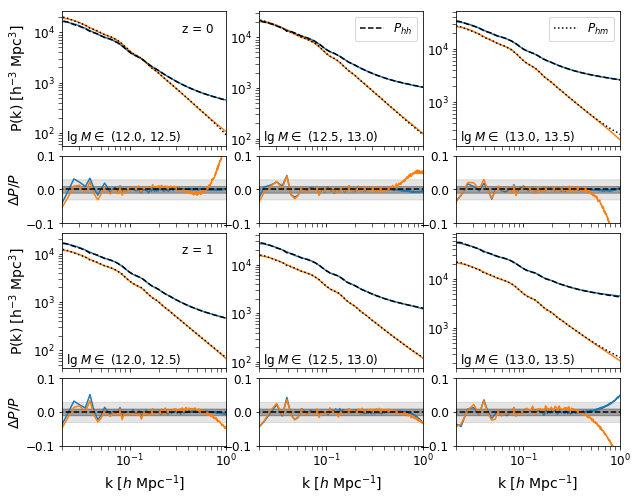

In [632]:
Mbins = [(12.0,12.5),(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'hspace':0.1,'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

kmaxs = [0.5]

sns = [1052.32765772, 2819.38427067, 1272.75374832, 4607.39656341]

counter = 0
for ii, z in enumerate(zs):
    
    
    for jj, Mbin in enumerate(Mbins):
        #print(ii,jj,counter)
        #sn = sns[ii]
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        #phh -= sn
        #axs[2*ii,jj].loglog(k,phh,'k')
        #axs[2*ii,jj].loglog(k,phm,'k--')
        
        for kk, kmax in enumerate(kmaxs):
            
            kmax = (z > 0.1) * 0.7 + (z<=0.1)*0.45
            
            if jj == 0:
                kmax = 0.75
                
            if ii == 1 and jj == 2:
                kmax = 0.5
            
            a,b,c = fitmodel_joint(zeldas[ii],k,phh,phm,kmax=kmax,model='lpt')
            phhemu = c[:1023]
            phmemu = c[1023:]
                        
            print(z,Mbin,a[:3],a[-1])
            
            axs[2*ii,jj].loglog(b,phhemu)
            axs[2*ii,jj].loglog(b,phmemu)
            
            axs[2*ii,jj].loglog(k,phh,'k--')
            axs[2*ii,jj].loglog(k,phm,'k:')
            
            axs[2*ii+1,jj].semilogx(k,(phhemu-phh)/phh)
            axs[2*ii+1,jj].semilogx(k,(phmemu-phm)/phm)
            
            axs[2*ii,jj].tick_params(which='minor', length=4)
            axs[2*ii+1,jj].tick_params(which='minor', length=4)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.02,1.01)
        axs[2*ii+1,jj].set_xlim(0.02,1.01)
        axs[2*ii,jj].set_ylim(0.6*np.min(phm[plotrange]),1.5*np.max(phh))
        
        axs[2*ii+1,jj].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
        axs[2*ii+1,jj].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.022, 0.75*np.min(phm[plotrange]), r'${\rm lg}\ M \in$ (%.1f, %.1f)' %(Mbin[0],Mbin[1]))
        
        counter += 1

            
# Do labels and axis labels separately

axs[0,1].loglog(k, k, c='k',ls='--', label=r'$P_{hh}$')
axs[0,1].legend()

axs[0,2].loglog(k, k, c='k', ls=':', label=r'$P_{hm}$')
axs[0,2].legend()

axs[0,0].text(0.35,1e4,'z = 0')
axs[2,0].text(0.35,1e4,'z = 1')

#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
#plt.tight_layout()

plt.savefig('./Figures/halo_pk_fits_lpt.pdf')

plt.show()

In [633]:
# Try Adding a counterterm to the cross spectrum

In [634]:
def combine_nbody_components(spectra,b1,b2,bs,alpha,beta,auto=True):
    
    if auto:
        model = (spectra[:,1] + 2*b1*spectra[:,2] + b1**2 * spectra[:,6] \
            + 2*b2*spectra[:,3] + 2*b1*b2*spectra[:,7] + b2**2 * spectra[:,10] \
            + 2*bs*spectra[:,4] + 2*b1*bs*spectra[:,8] + 2*b2*bs*spectra[:,11] + bs**2*spectra[:,13]\
            + 2*alpha*spectra[:,5] + 2*b1*alpha*spectra[:,9] + 2*b2*alpha*spectra[:,12] + 2*bs*alpha*spectra[:,14])
    else:
        model = (spectra[:,1] + b1*spectra[:,2] \
            + b2*spectra[:,3] \
            + bs*spectra[:,4] \
            + beta*spectra[:,5])
    return model

def getmodel_interp(k, spec, b1,b2,bs,alpha,beta,auto=True):
    return np.interp(k, spec[:,0], combine_nbody_components(spec,b1,b2,bs,alpha,beta,auto=auto))

def getmodel_joint(k,spec,b1,b2,bs,alpha,beta,s):
    return np.concatenate( (s+getmodel_interp(k,spec,b1,b2,bs,alpha,beta,auto=True),getmodel_interp(k,spec,b1,b2,bs,alpha,beta,auto=False))  )

def simple_bias_model(k, spec, s, a0, a1, a2):
    bias = a0 + a1*spectra[:,0] + a2*spectra[:,0]**2
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def linear_bias_model(k, spec, s, b): 
    bias = b 
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def fitmodel_joint(spec, k, phh, phm, kmax=0.5, model='lemu'):
    dk = k[5] - k[4]; dV = k**2 * dk
    krange = (k > 0.02) * (k < kmax)
    
    pmm = np.interp(k, spec[:,0], spec[:,1])
    #c_hh = (2 * phh**2 / dV)[krange]
    #c_hm = ((phh * pmm + phm**2) / dV)[krange]
    #c_x  = (2 * phh * phm / dV)[krange]
    
    c_hh = (1 / dV)[krange]
    c_hm = (1/ dV)[krange]
    c_x  = (0 / dV)[krange]
    
    N = np.sum(krange)
    cov = np.zeros((2*N,2*N))
    cov[0:N,0:N] = np.diag(c_hh)
    cov[N:,N:] = np.diag(c_hm)
    cov[0:N,N:] = np.diag(c_x); cov[N:,0:N] = np.diag(c_x)
    
    #sigmas = np.sqrt(2*pk**2/dV)
    
    if model == 'lemu':
        func = lambda x, b1, b2, bs, alpha,beta, s: getmodel_joint(x, spec, b1,b2,bs,alpha,beta,s)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                    ,p0=[0,0,0,0,0,1000], sigma = cov)[0]
    elif model == 'simple':
        print('Fitting using model' + model)
        func = lambda x, s, a0, a1, a2: simple_bias_model(x, spec, s, a0, a1, a2)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1,0,0], sigma = cov)[0]
    else:
        print('Fitting using model' + model)
        func = lambda x, s, a0: linear_bias_model(x, spec, s, a0)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1], sigma = cov)[0]
    
    
    return res, k, func(k,*res)

0 (12.0, 12.5) [-0.20102666 -0.23728338 -0.01211578] 272.908905378654
0 (12.5, 13.0) [-0.11337587 -0.33259088 -0.03386352] 669.9709305074673
0 (13.0, 13.5) [ 0.10397228 -0.42382487 -0.09434968] 1694.6714436603381
1.0 (12.0, 12.5) [ 0.30680606 -0.21445134 -0.72949666] 213.57386451681094
1.0 (12.5, 13.0) [ 0.69188386 -0.1530321  -1.36386369] 395.89652262433026
1.0 (13.0, 13.5) [ 1.35874903  0.38206683 -2.0679254 ] 3087.753942963375


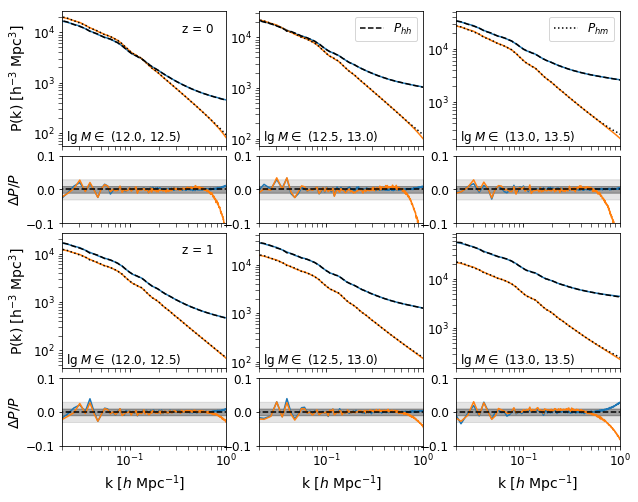

In [649]:
Mbins = [(12.0,12.5),(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'hspace':0.1,'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

kmaxs = [0.5]

sns = [1052.32765772, 2819.38427067, 1272.75374832, 4607.39656341]

counter = 0
for ii, z in enumerate(zs):
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mbin in enumerate(Mbins):
        #print(ii,jj,counter)
        #sn = sns[ii]
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        #phh -= sn
        #axs[2*ii,jj].loglog(k,phh,'k')
        #axs[2*ii,jj].loglog(k,phm,'k--')
        
        for kk, kmax in enumerate(kmaxs):
                            
            kmax = 0.7
            if jj == 2:
                kmax = 0.6
            
            a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
            phhemu = c[:1023]
            phmemu = c[1023:]
                        
            print(z,Mbin,a[:3],a[-1])
            
            axs[2*ii,jj].loglog(b,phhemu)
            axs[2*ii,jj].loglog(b,phmemu)
            
            axs[2*ii,jj].loglog(k,phh,'k--')
            axs[2*ii,jj].loglog(k,phm,'k:')
            
            axs[2*ii+1,jj].semilogx(k,(phhemu-phh)/phh)
            axs[2*ii+1,jj].semilogx(k,(phmemu-phm)/phm)
            
            axs[2*ii,jj].tick_params(which='minor', length=4)
            axs[2*ii+1,jj].tick_params(which='minor', length=4)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.02,1.01)
        axs[2*ii+1,jj].set_xlim(0.02,1.01)
        axs[2*ii,jj].set_ylim(0.6*np.min(phm[plotrange]),1.5*np.max(phh))
        
        axs[2*ii+1,jj].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
        axs[2*ii+1,jj].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.022, 0.75*np.min(phm[plotrange]), r'${\rm lg}\ M \in$ (%.1f, %.1f)' %(Mbin[0],Mbin[1]))
        
        counter += 1

            
# Do labels and axis labels separately

axs[0,1].loglog(k, k, c='k',ls='--', label=r'$P_{hh}$')
axs[0,1].legend()

axs[0,2].loglog(k, k, c='k', ls=':', label=r'$P_{hm}$')
axs[0,2].legend()

axs[0,0].text(0.35,1e4,'z = 0')
axs[2,0].text(0.35,1e4,'z = 1')

#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
#plt.tight_layout()

plt.savefig('./Figures/halo_pk_fits_beta.pdf')

plt.show()

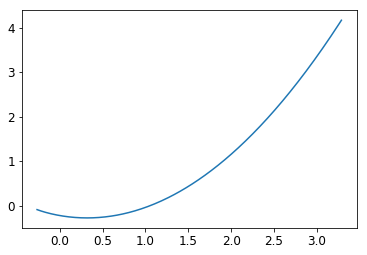

In [774]:
# Fitting with bias priors
def peak_background_bias(nu):
    """
    peak_background_bias(nu):
    Returns the Lagrangian biases, (b1,b2), given nu.
    This is helpful if we want to make our basis set f, nu and sFog.
    """
    delc = 1.686
    a    = 0.707
    p    = 0.30
    anu2 = a*nu**2
    b1   = (anu2-1+2*p/(1+anu2**p))/delc
    b2   = (anu2**2-3*anu2+2*p*(2*anu2+2*p-1)/(1+anu2**p))/delc**2
    return b1, 0.5*b2

nus = np.arange(0.5,3,0.01)
b1s, b2s = peak_background_bias(nus)

plt.plot(b1s,b2s)

plt.show()

b2func = lambda b1: np.interp(b1,b1s,b2s)
bsfunc = lambda b1: -2./7*b1
    

In [792]:
def combine_nbody_components(spectra,b1,b2,bs,alpha,auto=True):
    
    if auto:
        model = (spectra[:,1] + 2*b1*spectra[:,2] + b1**2 * spectra[:,6] \
            + 2*b2*spectra[:,3] + 2*b1*b2*spectra[:,7] + b2**2 * spectra[:,10] \
            + 2*bs*spectra[:,4] + 2*b1*bs*spectra[:,8] + 2*b2*bs*spectra[:,11] + bs**2*spectra[:,13]\
            + 2*alpha*spectra[:,5] + 2*b1*alpha*spectra[:,9] + 2*b2*alpha*spectra[:,12] + 2*bs*alpha*spectra[:,14])
    else:
        model = (spectra[:,1] + b1*spectra[:,2] \
            + b2*spectra[:,3] \
            + bs*spectra[:,4] \
            + alpha*spectra[:,5])
    return model

def getmodel_interp(k, spec, b1,b2,bs,alpha,auto=True):
    return np.interp(k, spec[:,0], combine_nbody_components(spec,b1,b2,bs,alpha,auto=auto))

def getmodel_joint(k,spec,b1,b2,bs,alpha,s):
    return np.concatenate( (s+getmodel_interp(k,spec,b1,b2,bs,alpha,auto=True),getmodel_interp(k,spec,b1,b2,bs,alpha,auto=False))  )

def simple_bias_model(k, spec, s, a0, a1, a2):
    bias = a0 + a1*spectra[:,0] + a2*spectra[:,0]**2
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def linear_bias_model(k, spec, s, b): 
    bias = b 
    phh = np.interp(k, spec[:,0], bias**2 * spec[:,1] + s)
    phm = np.interp(k, spec[:,0], bias * spec[:,1])
    
    return np.concatenate((phh,phm))

def fitmodel_joint(spec, k, phh, phm, kmax=0.5, model='lemu'):
    dk = k[5] - k[4]; dV = k**2 * dk
    krange = (k > 0.02) * (k < kmax)
    
    pmm = np.interp(k, spec[:,0], spec[:,1])
    #c_hh = (2 * phh**2 / dV)[krange]
    #c_hm = ((phh * pmm + phm**2) / dV)[krange]
    #c_x  = (2 * phh * phm / dV)[krange]
    
    c_hh = (1 / dV)[krange]
    c_hm = (1/ dV)[krange]
    c_x  = (0 / dV)[krange]
    
    N = np.sum(krange)
    cov = np.zeros((2*N,2*N))
    cov[0:N,0:N] = np.diag(c_hh)
    cov[N:,N:] = np.diag(c_hm)
    cov[0:N,N:] = np.diag(c_x); cov[N:,0:N] = np.diag(c_x)
    
    #sigmas = np.sqrt(2*pk**2/dV)
    bias_penalty = lambda b1, b2, bs: 5e4*( (b2 - b2func(b1))**2 + 1*(bs - bsfunc(b1))**2 )
    
    if model == 'lemu':
        func = lambda x, b1, b2, bs, alpha, s: getmodel_joint(x, spec, b1,b2,bs,alpha,s) + bias_penalty(b1,b2,bs)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                    ,p0=[0,0,0,0,1000], sigma = cov)[0]
    elif model == 'simple':
        print('Fitting using model' + model)
        func = lambda x, s, a0, a1, a2: simple_bias_model(x, spec, s, a0, a1, a2)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1,0,0], sigma = cov)[0]
    else:
        print('Fitting using model' + model)
        func = lambda x, s, a0: linear_bias_model(x, spec, s, a0)
        res = curve_fit(func,k[krange],np.concatenate( (phh[krange],phm[krange]) )\
                        ,p0=[1000,1], sigma = cov)[0]
    
    
    return res, k, func(k,*res)


0 (12.0, 12.5) [-0.18626689 -0.15642148  0.04550303] 500.2555469066706
0 (12.0, 12.5) -0.18626689118948409 -0.1412031973284087 0.05321911176842402
0 (12.5, 13.0) [-0.10583189 -0.22971885 -0.0049862 ] 1290.676291144968
0 (12.5, 13.0) -0.10583188948832666 -0.18234939452214455 0.03023768271095047
0 (13.0, 13.5) [ 0.09668139 -0.31347763 -0.08563948] 3148.1399422507866
0 (13.0, 13.5) 0.09668138819928386 -0.251967795991931 -0.02762325377122396
1.0 (12.0, 12.5) [ 0.32960193 -0.27901787 -0.09633176] 437.1475358410506
1.0 (12.0, 12.5) 0.3296019280427436 -0.27759905126854023 -0.09417197944078387
1.0 (12.5, 13.0) [ 0.72682187 -0.19022719 -0.21015699] 1175.14223808805
1.0 (12.5, 13.0) 0.7268218690025413 -0.19255441085649785 -0.20766339114358323
1.0 (13.0, 13.5) [ 1.39646461  0.33451147 -0.40205868] 3755.3541818382973
1.0 (13.0, 13.5) 1.3964646084538883 0.31232136775280694 -0.39898988812968234


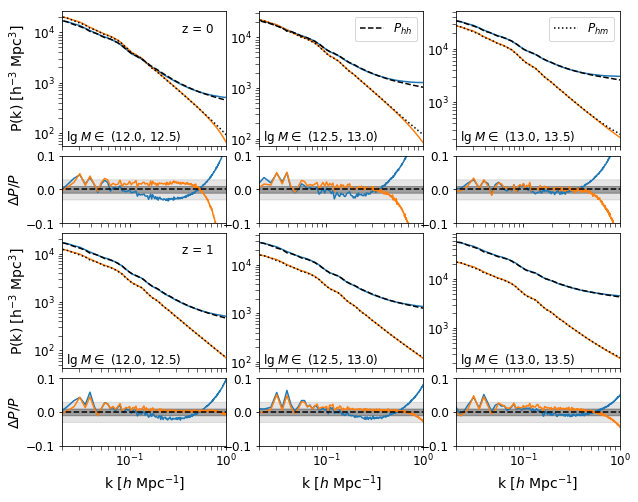

In [793]:
Mbins = [(12.0,12.5),(12.5,13.0),(13.0,13.5)]

f, axs = plt.subplots(figsize=(10,8),ncols=len(Mbins),nrows=2*len(zs),gridspec_kw={'hspace':0.1,'height_ratios':(2,1)*len(zs)})

plotrange = (k > 0.01) * (k<1.)

kmaxs = [0.5]

sns = [1052.32765772, 2819.38427067, 1272.75374832, 4607.39656341]

counter = 0
for ii, z in enumerate(zs):
    
    spectra = np.loadtxt(spectra_files[ii])
    
    for jj, Mbin in enumerate(Mbins):
        #print(ii,jj,counter)
        #sn = sns[ii]
        k, phh, pherr, phm, phmerr = np.loadtxt(halo_files[ii][jj]).T
        #phh -= sn
        #axs[2*ii,jj].loglog(k,phh,'k')
        #axs[2*ii,jj].loglog(k,phm,'k--')
        
        for kk, kmax in enumerate(kmaxs):
            
            kmax = (z > 0.1) * 0.7 + (z<=0.1)*0.45
            
            if jj == 0:
                kmax = 0.7
            
            a,b,c = fitmodel_joint(spectra,k,phh,phm,kmax=kmax)
            phhemu = c[:1023]
            phmemu = c[1023:]
                        
            print(z,Mbin,a[:3],a[-1])
            print(z,Mbin,a[0],b2func(a[0]),bsfunc(a[0]))
            
            axs[2*ii,jj].loglog(b,phhemu)
            axs[2*ii,jj].loglog(b,phmemu)
            
            axs[2*ii,jj].loglog(k,phh,'k--')
            axs[2*ii,jj].loglog(k,phm,'k:')
            
            axs[2*ii+1,jj].semilogx(k,(phhemu-phh)/phh)
            axs[2*ii+1,jj].semilogx(k,(phmemu-phm)/phm)
            
            axs[2*ii,jj].tick_params(which='minor', length=4)
            axs[2*ii+1,jj].tick_params(which='minor', length=4)
            
            #if ii == 0 and jj == 0:
                #axs[2*ii,jj].legend()
        
        axs[2*ii+1,jj].semilogx(k, 0*k, 'k--')
        
        #axs[2*ii,jj].set_title(r'$z = $ %.1f,   $\log_{10} M_{\rm min} =$ %.1f' %(zs[ii],Mbins[jj]))
         
        axs[2*ii,jj].set_xlim(0.02,1.01)
        axs[2*ii+1,jj].set_xlim(0.02,1.01)
        axs[2*ii,jj].set_ylim(0.6*np.min(phm[plotrange]),1.5*np.max(phh))
        
        axs[2*ii+1,jj].fill_between(k,-0.03,0.03,color='k',alpha=0.1)
        axs[2*ii+1,jj].fill_between(k,-0.01,0.01,color='k',alpha=0.3)
        axs[2*ii+1,jj].set_ylim(-0.1,0.1)
        
        axs[2*ii,jj].text(0.022, 0.75*np.min(phm[plotrange]), r'${\rm lg}\ M \in$ (%.1f, %.1f)' %(Mbin[0],Mbin[1]))
        
        counter += 1

            
# Do labels and axis labels separately

axs[0,1].loglog(k, k, c='k',ls='--', label=r'$P_{hh}$')
axs[0,1].legend()

axs[0,2].loglog(k, k, c='k', ls=':', label=r'$P_{hm}$')
axs[0,2].legend()

axs[0,0].text(0.35,1e4,'z = 0')
axs[2,0].text(0.35,1e4,'z = 1')

#axs[0,1].loglog(k, k, c=colors[0], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[0]))
#axs[0,1].loglog(k, k, c=colors[1], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[1]))
#axs[0,1].legend()

#axs[2,1].loglog(k, k, c=colors[2], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[2]))
#axs[2,1].loglog(k, k, c=colors[3], label=r'$k_{\rm max} = $ %.2f' %(kmaxs[3]))
#axs[2,1].legend()
            
for ii in range(len(Mbins)):
    axs[-1,ii].set_xlabel(r'k [$h$ Mpc$^{-1}$]')

for ii in range(len(zs)):
    axs[2*ii,0].set_ylabel(r'P(k) [h$^{-3}$ Mpc$^{3}$]')
    axs[2*ii+1,0].set_ylabel(r'$\Delta P / P$')

for ii in range(len(zs)):
    for jj in range(len(Mbins)):
        axs[2*ii,jj].set_xticklabels([])
        if ii != (len(zs)-1):
            axs[2*ii+1,jj].set_xticklabels([])
    
#plt.tight_layout()

plt.savefig('./Figures/halo_pk_fits_bias.pdf')

plt.show()